In [1]:
# Import the Cirq Library
import cirq

In [2]:
# Get two qubits, a data qubit and target qubit, respectively
q0, q1 = cirq.LineQubit.range(2)

In [4]:
# Dictionary of oracles
oracles = {'0':[],'1':[cirq.X(q1)], 'x':[cirq.CNOT(q0,q1)], 'notx':[cirq.CNOT(q0,q1), cirq.X(q1)]}

In [9]:
def deutsch_algorithm(oracle):
    """Yields a circuit for Deutsch's algorithm given operations implementing the oracle"""
    yield cirq.X(q1)
    yield cirq.H(q0), cirq.H(q1)
    yield oracle
    yield cirq.H(q0)
    yield cirq.measure(q0)
    

In [12]:
# Display each circuit for all oracles
for key, oracle in oracles.items():
    print('Circuit for {}:'.format(key))
    print(cirq.Circuit(list(deutsch_algorithm(oracle))))

Circuit for 0:
0: ───H───H───M───

1: ───X───H───────
Circuit for 1:
0: ───H───H───M───

1: ───X───H───X───
Circuit for x:
0: ───H───────@───H───M───
              │
1: ───X───H───X───────────
Circuit for notx:
0: ───H───────@───H───M───
              │
1: ───X───H───X───X───────


In [13]:
# Get a simulator 
simulator = cirq.Simulator()

In [16]:
# Execute the circuit for each oracle to distinguish constant from balanced
for key, oracle in oracles.items():
    result = simulator.run(
        cirq.Circuit(list(deutsch_algorithm(oracle))),
        repetitions=10
    )
    print('oracle: {} results: {}'.format(key, result))

oracle: 0 results: q(0)=0000000000
oracle: 1 results: q(0)=0000000000
oracle: x results: q(0)=1111111111
oracle: notx results: q(0)=1111111111


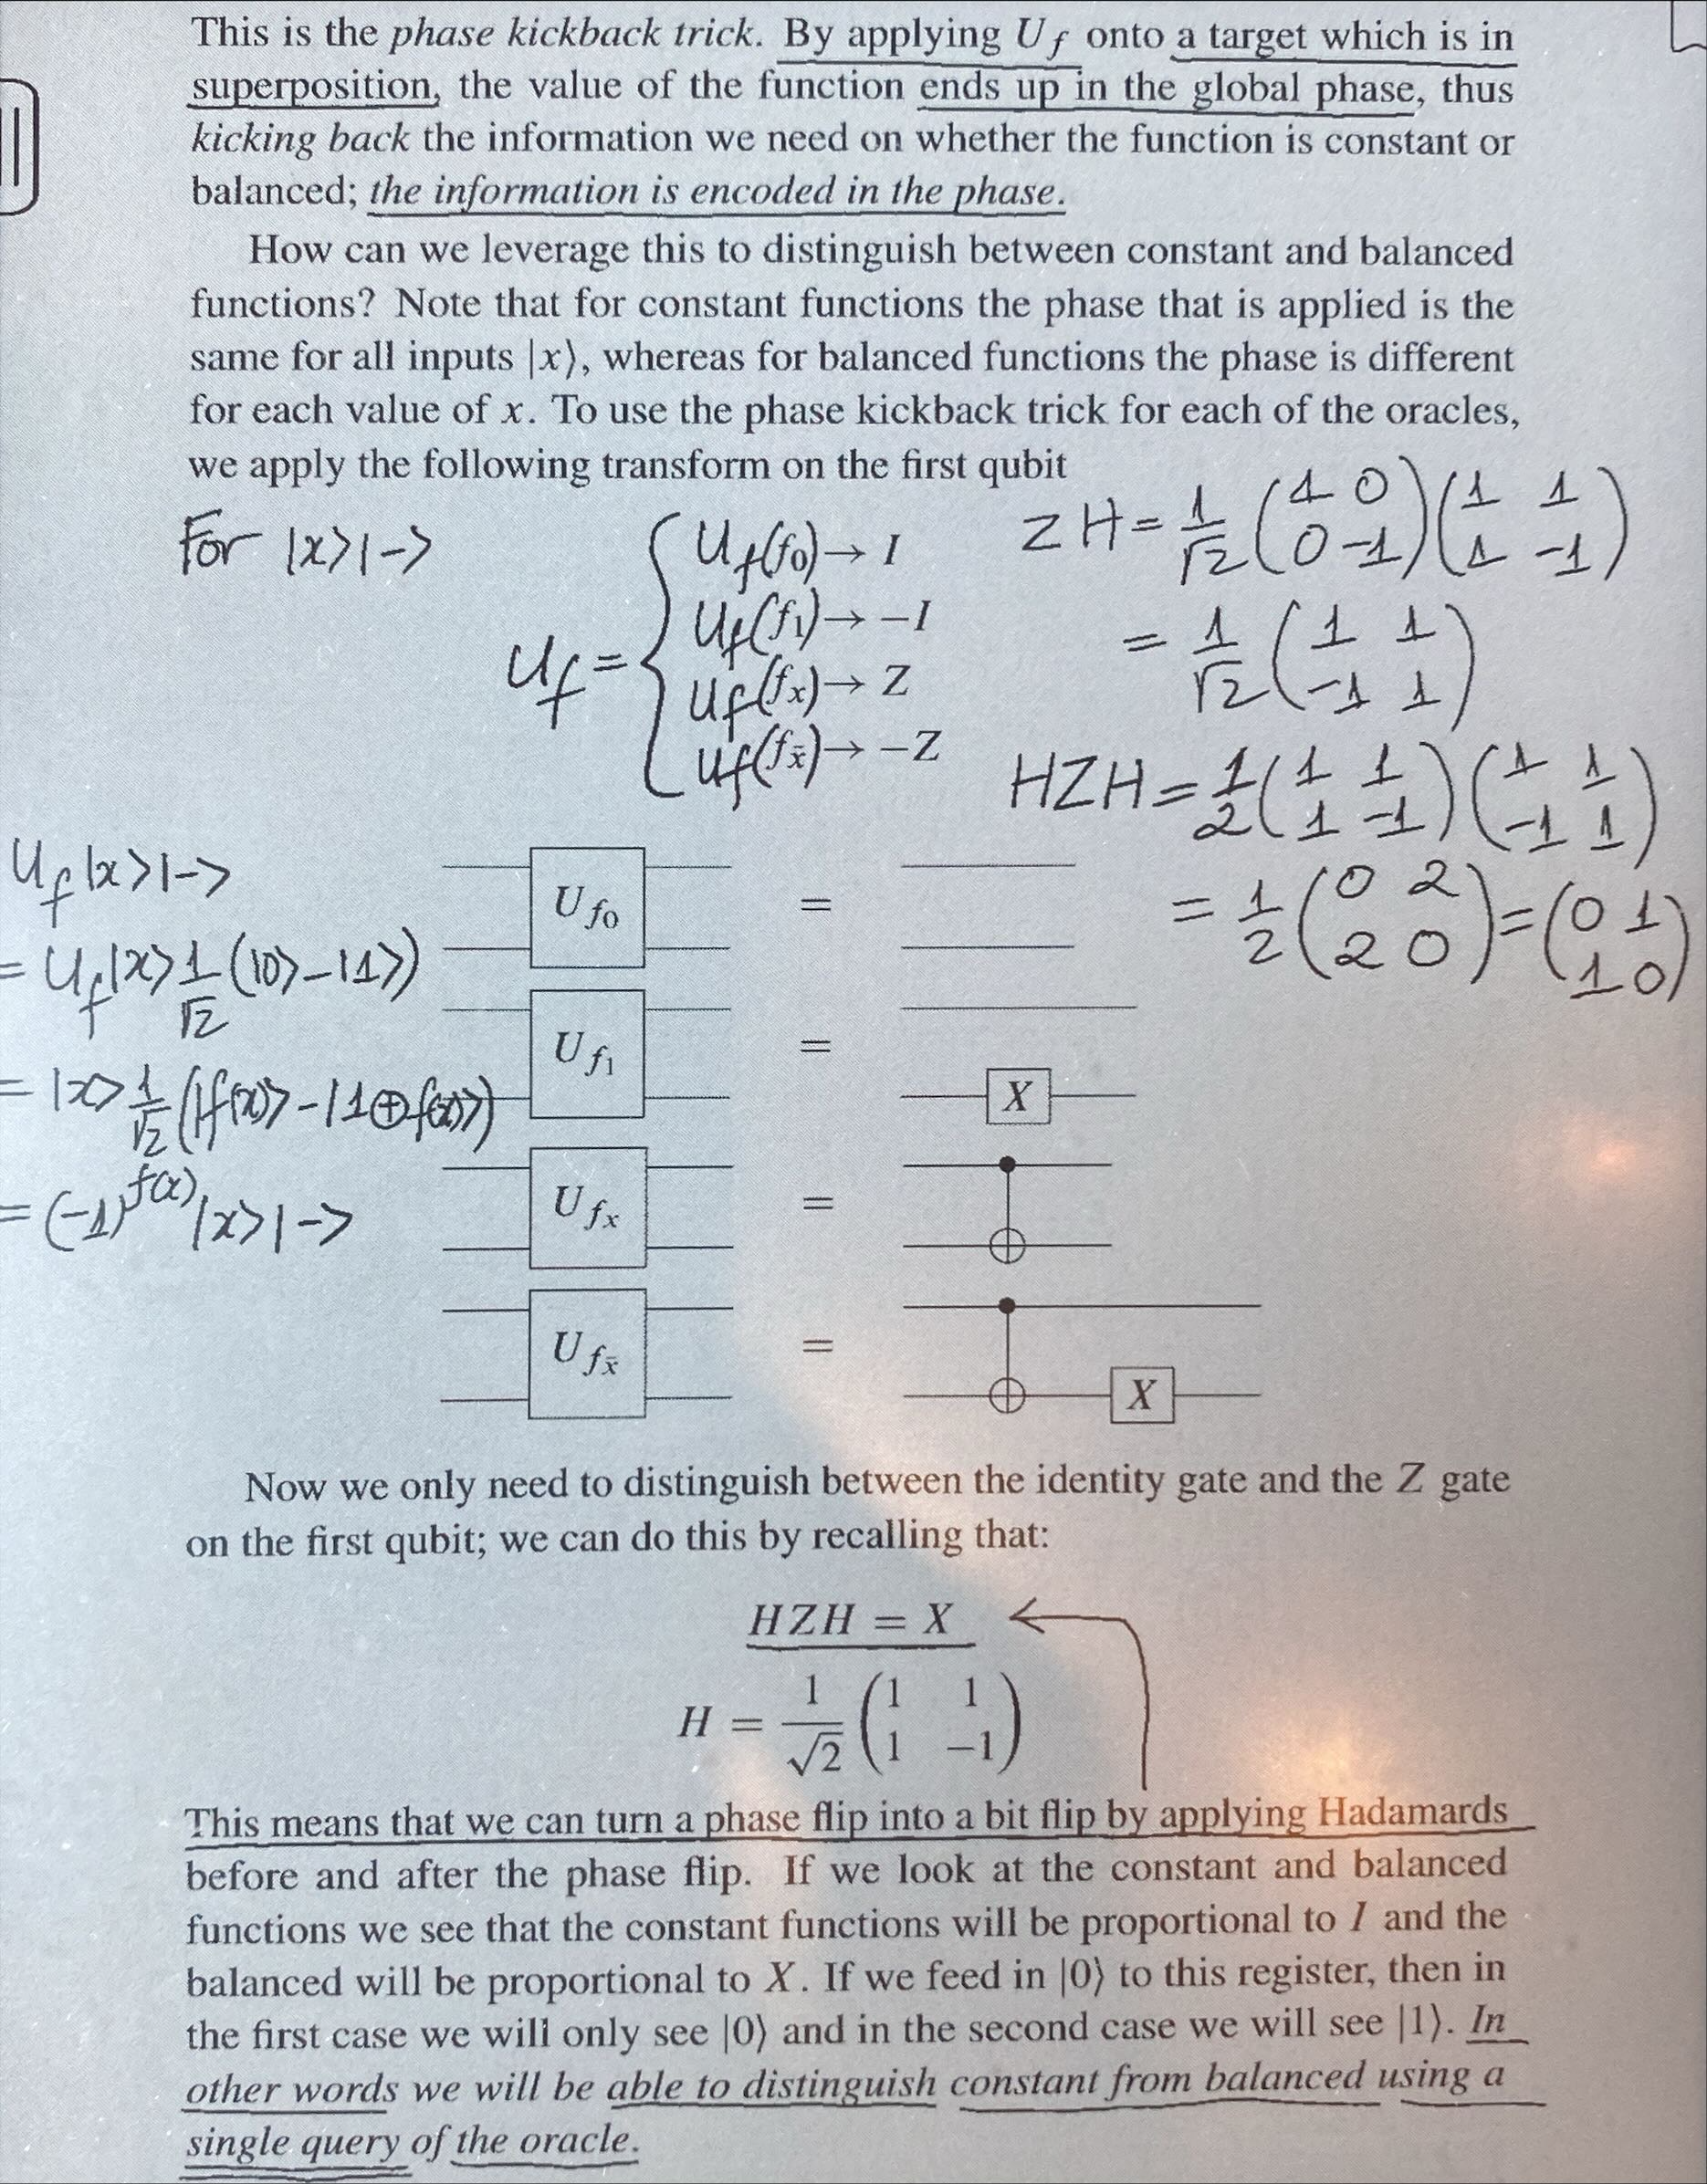